# Self-organizing map (SOM) analyses for "Co-occurrence of Fe and P stress in natural populations of the marine diazotroph Trichodesmium"

Note: You will need to install SOMPY (https://github.com/sevamoo/SOMPY) and run this code from within the directory

## Dependencies

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import sompy
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns

backend module://ipykernel.pylab.backend_inline version unknown
backend module://ipykernel.pylab.backend_inline version unknown


## Import Data

Here I provide a truncated version of the data for example purposes. Running this code with a larger dataset will take more time

In [2]:
Data1 = pd.read_csv('mydata/Trichoonly_normaled_top3precursor_forsompy_top500.csv')

Tr_Data = Data1.values[:,1:].astype(float)
headers = [Data1.columns[1:]]

## Set up a dataframe to feed the heatmap

In [3]:
heatmapdf = pd.DataFrame(index=Data1['ProteinAccession'], columns=Data1['ProteinAccession'])
heatmapdf = heatmapdf.fillna(0)

## SOM analysis

In [6]:
# map size is 10x10
mapsize = [10,10]

# see SOMPY manual for details 
som = sompy.SOMFactory.build(Tr_Data, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  

# here for demonstratin purposes I run the analysis 10 times. In the original analysis I ran the analysis 1000 times
c = 0
while c < 10:
    som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything
    map_labels = som.cluster(n_clusters=10)
    data_labels = np.array([map_labels[int(k)] for k in som._bmu[0]])
    tolabel = pd.DataFrame(Data1.iloc[:,0].copy())
    tolabel['label'] = data_labels
    m = tolabel.merge(tolabel, on='label')
    n = pd.crosstab(m.ProteinAccession_x, m.ProteinAccession_y)
    heatmapdf += n
    c += 1

 Training...
 pca_linear_initialization took: 0.005000 seconds
 Rough training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 7

 epoch: 1 ---> elapsed time:  0.105000, quantization error: 2.414305

 epoch: 2 ---> elapsed time:  0.107000, quantization error: 1.513710

 epoch: 3 ---> elapsed time:  0.108000, quantization error: 1.418782

 epoch: 4 ---> elapsed time:  0.104000, quantization error: 1.326356

 epoch: 5 ---> elapsed time:  0.103000, quantization error: 1.274381

 epoch: 6 ---> elapsed time:  0.103000, quantization error: 1.230478

 epoch: 7 ---> elapsed time:  0.103000, quantization error: 1.186923

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 9

 epoch: 1 ---> elapsed time:  0.103000, quantization error: 1.138765

 epoch: 2 ---> elapsed time:  0.103000, quantization error: 1.135247

 epoch: 3 ---> elapsed time:  0.106000, quantization error: 1.135142

 epoch: 4 ---> elapsed time:  0.104000, quantization error: 1.132056

 epo

 epoch: 7 ---> elapsed time:  0.103000, quantization error: 1.131548

 epoch: 8 ---> elapsed time:  0.103000, quantization error: 1.131400

 epoch: 9 ---> elapsed time:  0.103000, quantization error: 1.131209

 Final quantization error: 1.131209
 train took: 1.686000 seconds
 Training...
 pca_linear_initialization took: 0.004000 seconds
 Rough training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 7

 epoch: 1 ---> elapsed time:  0.108000, quantization error: 2.414305

 epoch: 2 ---> elapsed time:  0.105000, quantization error: 1.513710

 epoch: 3 ---> elapsed time:  0.107000, quantization error: 1.418782

 epoch: 4 ---> elapsed time:  0.104000, quantization error: 1.326356

 epoch: 5 ---> elapsed time:  0.114000, quantization error: 1.274381

 epoch: 6 ---> elapsed time:  0.108000, quantization error: 1.230478

 epoch: 7 ---> elapsed time:  0.105000, quantization error: 1.186923

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 9

 epoch: 

## Write to file

In [ ]:
heatmapdf.to_csv('190926_heatmapdf_top3precursor_top500results.csv')

## Create a clustered heatmap for display

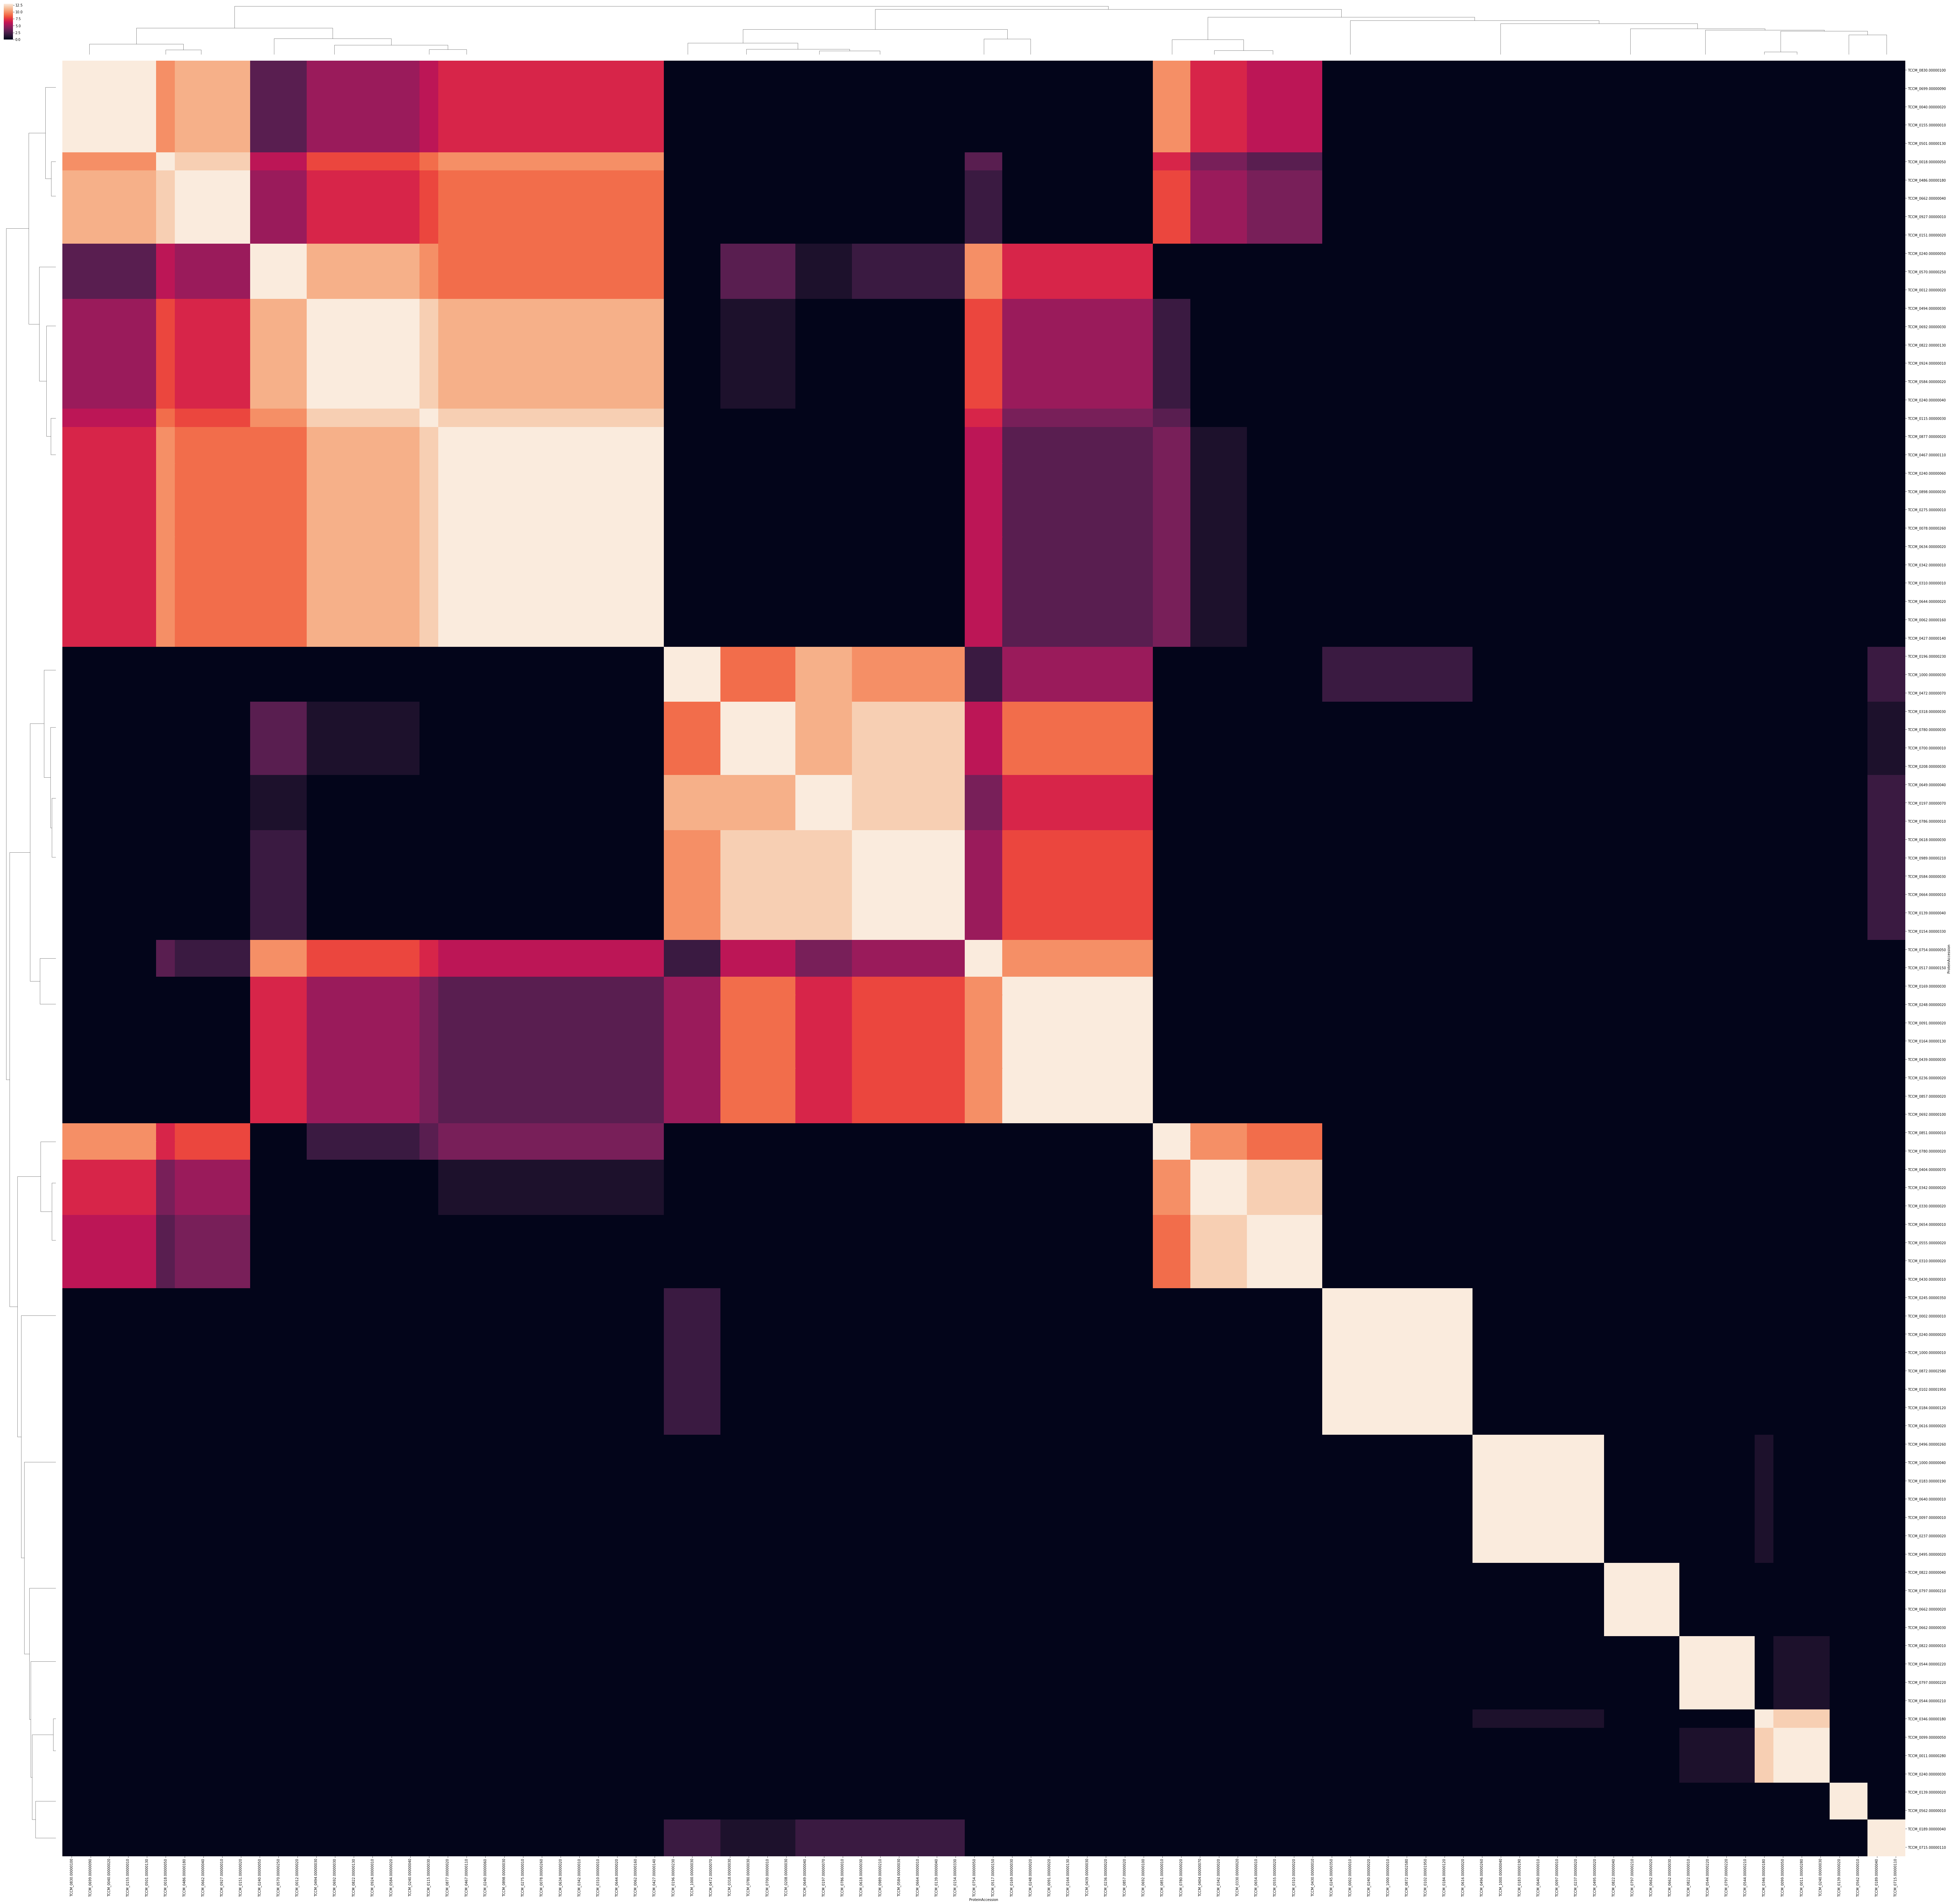

In [8]:
df = heatmapdf
dropped =df.iloc[1:99,1:99].fillna(0)
dropped2 = preprocessing.scale(dropped)
sns.clustermap(dropped, figsize=(100,100))
plt.show()